In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas_datareader import data, wb
from datetime import datetime, timedelta
import numpy as np
%matplotlib inline
import sqlite3

# Ativos da Carteira

In [13]:
conn = sqlite3.connect('ativos1.db')
cursor = conn.cursor()
#Cria o array de ativos e dos ativos com quantidade
query =" SELECT sigla, qtd FROM ativos WHERE moeda <> 'DIGITAL';"
cursor.execute(query)
ativos_qtd = {}
ativos = []
pesos = []
for linha in cursor:
    ativos_qtd[linha[0]] = linha[1] 
    ativos.append(linha[0]) 
conn.close()


In [14]:
start = datetime(2016,1,1)
ativos

['ABEV3.SA', 'ENBR3.SA', 'ITUB3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ITSA4.SA']

In [15]:
#ativos/ações 
tickers= ativos

#busca os ativos de acordo com a data inicial 
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]= data.DataReader(t, data_source='yahoo', start=start)['Adj Close']


In [16]:
acoes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1208 entries, 2016-01-04 to 2020-11-09
Data columns (total 6 columns):
ABEV3.SA    1208 non-null float64
ENBR3.SA    1208 non-null float64
ITUB3.SA    1208 non-null float64
ITUB4.SA    1208 non-null float64
BBDC4.SA    1208 non-null float64
ITSA4.SA    1208 non-null float64
dtypes: float64(6)
memory usage: 66.1 KB


In [17]:
#ultima cotacao
acoes.tail(1)

,ABEV3.SA,ENBR3.SA,ITUB3.SA,ITUB4.SA,BBDC4.SA,ITSA4.SA
Date,,,,,,
2020-11-09,13.9,18.719999,25.08,27.35,22.74,10.29


In [18]:
#Calcula o valor total das acoes na carteira - (ativo * qtd)
total = 0.0
for key, value in ativos_qtd.items():
    total += (acoes[key].tail(1).sum() * value)

#cria o array de  peso do ativos contidos na carteira    
pesos = []
for key, value in ativos_qtd.items():
     #"%.4f" % (acoes[key].tail(1).sum() *  value / total)
    pesos.append(round(acoes[key].tail(1).sum() *  value / total,4))

conn.close()    
#pega ultima cotação


In [24]:
pesos

[0.1323, 0.2105, 0.2386, 0.1183, 0.0688, 0.2314]

In [20]:
#weights = np.array([0.2103,0.1383,0.2540,0.1187,0.0728,0.2059])
#weights = np.array(pesos)
total

2312.039972305298

# Retornos

In [29]:
#retorno diario dos aivos
returns = acoes / acoes.shift(1) - 1
returns.head()

,ABEV3.SA,ENBR3.SA,ITUB3.SA,ITUB4.SA,BBDC4.SA,ITSA4.SA
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.015689,0.052357,0.021214,0.008358,0.004233,0.016666
2016-01-06,-0.009725,0.006739,-0.005938,-0.003946,-0.014169,0.008941
2016-01-07,-0.026574,-0.061973,-0.011940,-0.019017,-0.020233,-0.014770
2016-01-08,0.013056,0.035714,0.015538,0.000400,-0.019566,0.000000


# Obtendo a Fronteira Eficiente Markowitz

In [30]:
log_returns = np.log(acoes / acoes.shift(1)) 
log_returns.max()

ABEV3.SA    0.094139
ENBR3.SA    0.144581
ITUB3.SA    0.104657
ITUB4.SA    0.104894
BBDC4.SA    0.155866
ITSA4.SA    0.097758
dtype: float64

In [31]:
#retorno anual
log_returns.mean() * 250

ABEV3.SA   -0.019044
ENBR3.SA    0.161184
ITUB3.SA    0.175298
ITUB4.SA    0.169015
BBDC4.SA    0.179522
ITSA4.SA    0.197023
dtype: float64

In [32]:
log_returns.cov() * 250

,ABEV3.SA,ENBR3.SA,ITUB3.SA,ITUB4.SA,BBDC4.SA,ITSA4.SA
ABEV3.SA,0.080790,0.035603,0.042665,0.046713,0.053959,0.045856
ENBR3.SA,0.035603,0.093905,0.045398,0.052116,0.059512,0.053575
ITUB3.SA,0.042665,0.045398,0.091404,0.092737,0.097510,0.085917
ITUB4.SA,0.046713,0.052116,0.092737,0.113390,0.114263,0.102688
BBDC4.SA,0.053959,0.059512,0.097510,0.114263,0.149688,0.107193
ITSA4.SA,0.045856,0.053575,0.085917,0.102688,0.107193,0.106508


In [33]:
#correlação entre os ativos
log_returns.corr()

,ABEV3.SA,ENBR3.SA,ITUB3.SA,ITUB4.SA,BBDC4.SA,ITSA4.SA
ABEV3.SA,1.000000,0.408756,0.496487,0.488052,0.490670,0.494335
ENBR3.SA,0.408756,1.000000,0.490016,0.505056,0.501955,0.535706
ITUB3.SA,0.496487,0.490016,1.000000,0.910929,0.833635,0.870778
ITUB4.SA,0.488052,0.505056,0.910929,1.000000,0.877050,0.934413
BBDC4.SA,0.490670,0.501955,0.833635,0.877050,1.000000,0.848948
ITSA4.SA,0.494335,0.535706,0.870778,0.934413,0.848948,1.000000


In [34]:
num_assets = len(tickers)
num_assets

6

In [35]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
#weights = np.array(pesos)
weights

array([0.28681235, 0.280604  , 0.02878356, 0.17495156, 0.02373777,
       0.20511076])

In [36]:
weights[0] + weights[1] + weights[2] + weights[3] + weights[4] + weights[5]

1.0

In [37]:
#Expected Portofolio Retrun
np.sum(weights * log_returns.mean()) * 250

0.11905497582427656

In [38]:
#Expected Portofolio Variance
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.06365888782604914

In [39]:
#Expected Portofolio Volatility
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.2523071299548412

In [40]:
pfolio_returns =[]
pfolio_volatilities = []

for x in range(360):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns



array([0.15974167, 0.10707065, 0.14063107, 0.16913097, 0.15591529,
       0.15584097, 0.12655432, 0.12269904, 0.17351881, 0.18300542,
       0.14879937, 0.12449927, 0.13346759, 0.15298911, 0.15363994,
       0.14709322, 0.15296735, 0.15328767, 0.14447316, 0.14084954,
       0.1265386 , 0.1682352 , 0.12118362, 0.11742547, 0.1740996 ,
       0.14512519, 0.17941474, 0.1648578 , 0.13913026, 0.16761479,
       0.17120475, 0.14187551, 0.17288489, 0.13964641, 0.13106437,
       0.14761787, 0.14980976, 0.14006695, 0.15900064, 0.12152266,
       0.1386724 , 0.16107097, 0.15777824, 0.12933913, 0.1256116 ,
       0.13852295, 0.14708408, 0.11979491, 0.1467356 , 0.15089855,
       0.13526098, 0.16074528, 0.16905869, 0.15650582, 0.13964172,
       0.14405862, 0.12508907, 0.14090272, 0.15768035, 0.14735477,
       0.14410881, 0.1638073 , 0.15213097, 0.12241735, 0.13846136,
       0.13297817, 0.11044628, 0.13054669, 0.17180961, 0.15605578,
       0.12826962, 0.14634313, 0.11865471, 0.14095937, 0.16099

In [41]:
pfolio_volatilities

array([0.29246182, 0.26186723, 0.27516263, 0.28329215, 0.29022882,
       0.2713911 , 0.27038864, 0.26754047, 0.3086344 , 0.33367039,
       0.28579728, 0.26842572, 0.26881337, 0.28047897, 0.28136886,
       0.28227564, 0.2858462 , 0.28995339, 0.26686542, 0.28198888,
       0.27755603, 0.30743453, 0.26827913, 0.26949547, 0.2998935 ,
       0.2611373 , 0.30515992, 0.29418107, 0.27223892, 0.29101238,
       0.28569597, 0.28224284, 0.30435295, 0.27021679, 0.26215162,
       0.26934467, 0.29400949, 0.27871613, 0.26906903, 0.27523586,
       0.26345399, 0.28894541, 0.26050076, 0.26407444, 0.26742213,
       0.26221483, 0.2834553 , 0.25593792, 0.26989136, 0.28530512,
       0.27785336, 0.30170552, 0.3085074 , 0.27873341, 0.29730474,
       0.26198317, 0.27210517, 0.28163086, 0.26975085, 0.28584722,
       0.28841794, 0.30345061, 0.29128723, 0.26823122, 0.25368192,
       0.26564469, 0.25131891, 0.27465529, 0.29256865, 0.27013931,
       0.26833279, 0.26819972, 0.28523351, 0.26988833, 0.27593

In [42]:
pfolio = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [43]:
pfolio.head()

,Return,Volatility
0,0.159742,0.292462
1,0.107071,0.261867
2,0.140631,0.275163
3,0.169131,0.283292
4,0.155915,0.290229


In [44]:
pfolio.tail()

,Return,Volatility
355,0.136906,0.263497
356,0.118206,0.259997
357,0.129216,0.259960
358,0.152018,0.276701
359,0.168088,0.288606


Text(0, 0.5, 'Expected Return')

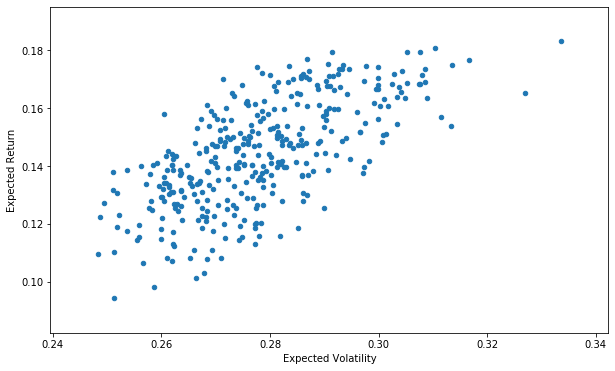

In [45]:
pfolio.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')


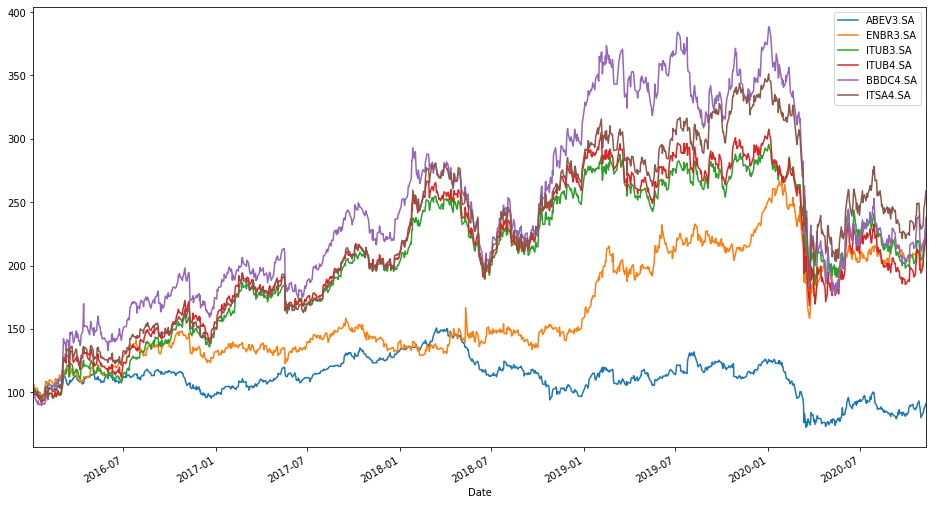

In [46]:
#normaliza atual / primeira * 100 neste caso toda a primeira será 100 tendo assim um ponto de referência
#evolução das ações(dados do yahoo finance)
(acoes / acoes.iloc[0] * 100).plot(figsize = (16,9));
plt.legend()
plt.show()

In [47]:
#retornos anuais dos ativos
retornos_anual = returns.mean() * 250
retornos_anual

ABEV3.SA    0.021082
ENBR3.SA    0.208135
ITUB3.SA    0.221007
ITUB4.SA    0.225725
BBDC4.SA    0.254351
ITSA4.SA    0.250235
dtype: float64

In [48]:
# Retorno anual da carteira com seus respectivos pesos - pega os valores do yahoo finance. 
portofolio_1 = str(round(np.dot(retornos_anual, pesos),5) *100) + ' %'
#portofolio_1 = str(round(np.dot(retornos_anual, weights) *100, 5)) + ' %'
print(portofolio_1) 


20.144000000000002 %


# Correlação

In [49]:
def plot_corr(corr):
    # Cortaremos a metade de cima pois é o espelho da metade de baixo
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, 1)] = True

    sns.heatmap(corr, mask=mask, cmap='RdBu', center=0, square=True, linewidths=.5,annot=True  )

,ABEV3.SA,ENBR3.SA,ITUB3.SA,ITUB4.SA,BBDC4.SA,XPML11.SA
ABEV3.SA,1.000000,-0.104396,0.232779,0.297233,0.284765,0.090476
ENBR3.SA,-0.104396,1.000000,0.783642,0.746165,0.799234,0.752655
ITUB3.SA,0.232779,0.783642,1.000000,0.992473,0.966094,0.696247
ITUB4.SA,0.297233,0.746165,0.992473,1.000000,0.976108,0.616575
BBDC4.SA,0.284765,0.799234,0.966094,0.976108,1.000000,0.679057
XPML11.SA,0.090476,0.752655,0.696247,0.616575,0.679057,1.000000


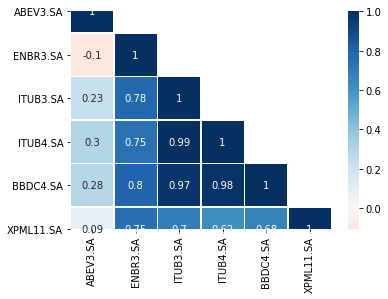

In [99]:
#Correlações entre os ativos da carteira
#plt.figure(figsize=(16,8))
plot_corr(acoes.corr())
acoes.corr()

In [100]:
#plt.figure(figsize=(10,6))
#sns.heatmap(acoes.corr() ,cmap='RdBu', square=True, linewidths=.2,annot=True)
